# Visualization of inversion - dipping model data

In [1]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.stats as sp

from fatiando import utils
from fatiando.vis import mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import plot_functions as pf

In [4]:
mypath = 'results/single-test/'

In [5]:
with open(mypath+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [6]:
with open('model.pickle') as w:
        model = pickle.load(w)

In [7]:
inversion['estimate'][-1]

653.2853636034527

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


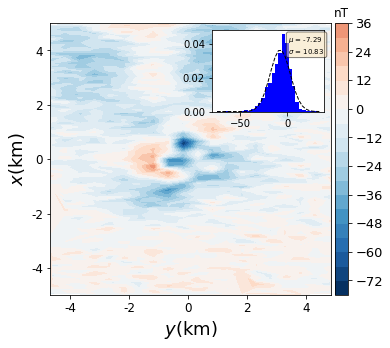

In [8]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(inversion['x']), np.max(inversion['x']))
#plt.ylim(np.min(inversion['y']), np.max(inversion['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.show()

In [9]:
x = inversion['x']/1000.
y = inversion['y']/1000.
z = inversion['z']/1000.

for i in range(len(inversion['prisms'])):
    inversion['prisms'][i].x /= 1000.
    inversion['prisms'][i].y /= 1000.
    inversion['prisms'][i].z1 /= 1000.
    inversion['prisms'][i].z2 /= 1000.
    inversion['initial_estimate'][i].x /= 1000.
    inversion['initial_estimate'][i].y /= 1000.
    inversion['initial_estimate'][i].z1 /= 1000.
    inversion['initial_estimate'][i].z2 /= 1000.
#     model['prisms'][i].x /= 1000.
#     model['prisms'][i].y /= 1000.
#     model['prisms'][i].z1 /= 1000.
#     model['prisms'][i].z2 /= 1000.
    
for i in model['prisms']:
    i.x /= 1000.
    i.y /= 1000.
    i.z1 /= 1000.
    i.z2 /= 1000.

In [10]:
verts = pf.plot_prisms(inversion['prisms'])
verts_true = pf.plot_prisms(model['prisms'])
verts_initial = pf.plot_prisms(inversion['initial_estimate'])

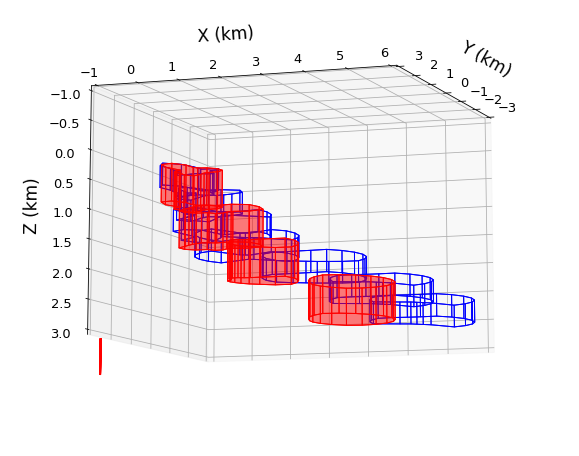

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-1, 6, 100)
ax.set_zlim(3, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 20)
plt.show()

#img(filename=mypath+'complex_3d_estimate.png', width=400, height=400)